# Data Science CoderHouse [Comision 61690]



### Alumno: Juan Francisco Alegre

##Introducción
Analizaremos que clientes existentes del banco portugués tienen mas posiblidades de suscribirse a un deposito a largo plazo, para poder centrar los esfuerzos de marketing en un nicho especifico.

## Descripción del Problema

El banco portugués ha sufrido una caída de ingresos y le gustaría saber qué medidas tomar. Tras una investigación, descubrió que la causa principal era que sus clientes no invertían lo suficiente en depósitos a largo plazo. Intentaremos identificar que clientes son mas propensos a invertir en depósitos a largo plazo para poder mejorar la gestión de los recursos de marketing. En este sentido, el análisis de datos y la construcción de modelos de clasificación pueden proporcionar insights valiosos para mejorar la toma de decisiones.

## Objetivo

El objetivo principal de este trabajo es construir un modelo de clasificación que pueda predecir si un cliente invertira en un depósitos a largo plazo o no. Para lograr este objetivo, se explorará un conjunto de datos relacionado con campañas de marketing, se realizará un análisis exploratorio de los datos para comprender mejor las características y los patrones presentes en ellos.


## Fuente

Los datos utilizados en este trabajo fueron obtenidos de Kaggle y se encuentran disponibles en el siguiente enlace: https://www.kaggle.com/datasets/rashmiranu/banking-dataset-classification

Este conjunto de datos proporciona información detallada sobre campañas de marketing, esta compuesto por las siguientes columnas:

age (edad del cliente), job (tipo de trabajo), marital (estado civil),
education	(nivel educativo), default	(¿Tiene crédito en mora?), housing	(¿Tiene préstamo para vivienda?), loan	(¿Tiene préstamo personal?), contact	(Tipo de comunicación de contacto), month	(último mes de contacto del año), day_of_week	(último día de contacto de la semana), duration	(Duración del último contacto, en segundos), campaign	(Número de contactos realizados durante esta campaña y para este cliente), pdays	(Número de días transcurridos desde que se contactó por última vez al cliente de una campaña anterior), previous	(Número de contactos realizados antes de esta campaña y para este cliente), poutcome	(resultado de la campaña de marketing anterior), y (¿El cliente ha suscrito un depósito a plazo?)


## Importación de Librerías y Carga de Datos


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = "/content/drive/MyDrive/Data Science 1 - Coderhouse - Alegre Juan Francisco/Banking Dataset Classification.csv"

In [4]:
df = pd.read_csv(file_path, sep=';')

## Exploración de Datos

En esta sección, exploramos el conjunto de datos para comprender sus características y distribuciones. Esto nos ayudará a identificar patrones y relaciones entre las variables.

- Resumen Inicial: Mostrar las primeras filas del DataFrame y obtener una vista previa de los datos.
- Estadísticas Descriptivas: Calcular estadísticas descriptivas como media, mediana, desviación estándar, etc.
- Distribuciones: Visualizar las distribuciones de las variables numéricas y categóricas.
- Gráficos Exploratorios: Crear gráficos como histogramas, diagramas de dispersión, y diagramas de caja para explorar los datos.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


El conjunto de datos contiene un total de 32.950 filas (registros) y 16 columnas (variables).

Se observa que ninguna columna tiene valores faltantes (non-null es igual que el número total de filas).


---



**Variables Potencialmente Relevantes:**

Algunas variables que podrían ser relevantes para predecir la inversion a largo plazo de deposito incluyen "age" "job" "education" "default" "housing" "loan" "contact" "duration" "pday".

In [6]:
df.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


**age:**
Describe los años de las personas que se contactaron en la campaña.
- El monto promedio de edad es de 40 años.
- El monto mínimo es de 17 años y la edad maxima de 98 años.
- La distribución parece estar concentrada en edades cercanas a los 32-47 años (percentiles 25%-75%).

**duration:**
Duración del último contacto, en segundos.
- El monto promedio de la duración del contacto es de aproximadamente 258 segundos (4 min aprox).
- El monto mínimo es de 0, es decir que no hubo contacto. Y el máximo es de 4918 segundos.
- La desviación estándar es significativa. Esto indica que algunas llamadas son muy breves mientras que otras se extienden bastante.

**campaign:**
Número de contactos realizados durante esta campaña y para este cliente (incluye el último contacto).
- La media es de entre 2 y 3 contactos.
- El minimo fue de 1 contacto y el máximo de 56, esto podría reflejar esfuerzos poco eficientes, ya que demasiados intentos pueden generar rechazo.

**pdays:**
Número de días transcurridos desde que se contactó por última vez al cliente de una campaña anterior (999 significa que el cliente no fue contactado previamente)
- El analisis de esta columna esta influido por el 999.

**previous:**
Número de contactos realizados antes de esta campaña y para este cliente.
- La desviación estándar aquí es baja porque la mayoría de los clientes no fueron contactados previamente (valor 0 en los percentiles 50% y 75%). Sin embargo, hay clientes que fueron contactados hasta 7 veces, lo que genera cierta dispersión.

In [7]:
df[df['y'] == 'yes'].describe()

,age,duration,campaign,pdays,previous
count,3712.000000,3712.000000,3712.000000,3712.000000,3712.000000
mean,40.851293,549.398976,2.054957,790.336207,0.496498
std,13.760020,397.490060,1.656486,404.617231,0.862394
min,17.000000,63.000000,1.000000,0.000000,0.000000
25%,31.000000,252.000000,1.000000,999.000000,0.000000
50%,37.000000,448.000000,2.000000,999.000000,0.000000
75%,50.000000,737.000000,2.000000,999.000000,1.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000


Si analizamos solamente las variables de las personas que terminaron invirtiendo en un depósito a largo plazo, podemos observar que en la edad no varia mucho, pero si en la duracion del contacto. La media es mucho mayor y el minimo es de 63 segundos (1 minuto). Ademas podemos ver que la cantidad de contactos tambien varia de forma significativa, baja la media mas cercana a 2 contactos, el maximo es de 23 contactos contra los 56 anteriores, es decir que podriamos determinar que la cantidad de contactos puede definitivamente generar rechazos.

In [8]:
df.head(20)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


### Hipótesis planteadas

1. Los clientes más jóvenes y con mayor nivel educativo tienen una mayor probabilidad de aceptar la oferta.
2. A mayor duración del contacto, mayor es la probabilidad de que el cliente acepte.
3. Los clientes solteros tienen una mayor probabilidad de aceptar la oferta.
4. Si los clientes tienen crédito en mora (default), prestamos hipotecarios y/o personales, la probabilidad de que acepten la oferta es menor.
5. Las campañas son más efectivas en determinados meses y días de la semana.

###Porcentaje de Clientes que respondieron a la campaña:

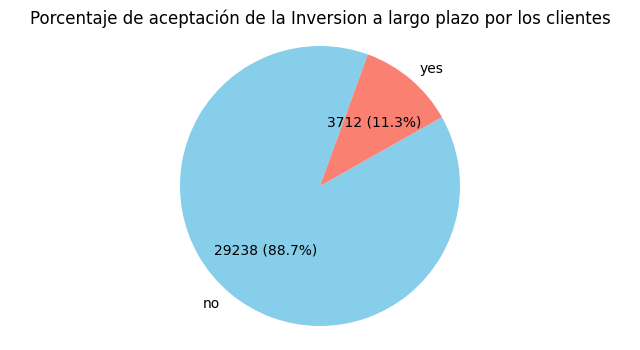

In [9]:
# Contar la cantidad de aceptaciones y rechazos
acceptance_counts = df['y'].value_counts()

# Crear el gráfico de torta
plt.figure(figsize=(8, 4))

# Función para mostrar cantidad y porcentaje
def func(pct, allval):
    absolute = int(round(pct / 100. * sum(allval)))
    return f'{absolute} ({pct:.1f}%)'

plt.pie(
    acceptance_counts,
    labels=acceptance_counts.index,
    autopct=lambda pct: func(pct, acceptance_counts),
    startangle=70,
    colors=['skyblue', 'salmon'])

plt.title('Porcentaje de aceptación de la Inversion a largo plazo por los clientes')
plt.axis('equal')  # Igualar el aspecto del gráfico para que sea circular
plt.show()

Se puede observar, que solo un 11% de los clientes aceptaron invertir en un deposito a largo plazo, por eso la importancia de determinar que caracteristicas tiene que tener el cliente para tener una campaña mas eficiente y mejorar la utilización de los recursos.

###Los clientes más jóvenes y con mayor nivel educativo tienen una mayor probabilidad de aceptar la oferta.

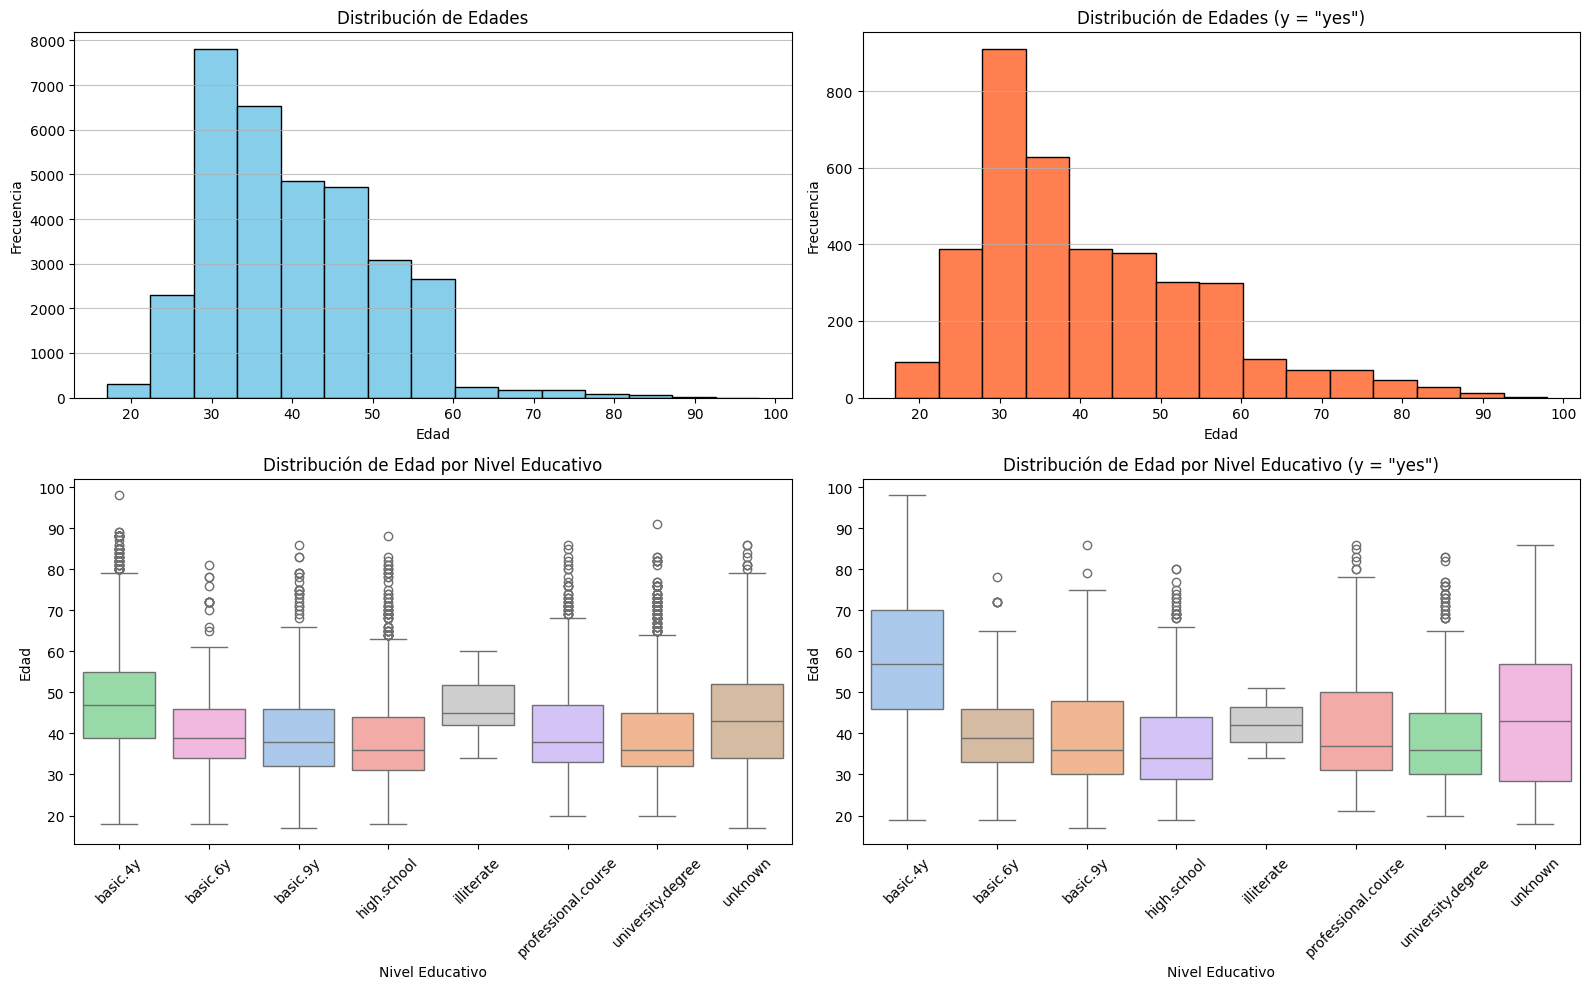

In [10]:
# Filtrar para obtener solo los clientes que aceptaron la oferta
df_yes = df[df['y'] == 'yes']

# Ordenar los niveles educativos alfabéticamente
education_order = sorted(df['education'].unique())

# Crear la figura y subplots (2 filas, 2 columnas)
fig, axs = plt.subplots(2, 2, figsize=(16, 10))

# Gráfico 1: Distribución de edades (todos los clientes)
axs[0, 0].hist(df['age'], bins=15, color='skyblue', edgecolor='black')
axs[0, 0].set_title('Distribución de Edades')
axs[0, 0].set_xlabel('Edad')
axs[0, 0].set_ylabel('Frecuencia')
axs[0, 0].grid(axis='y', alpha=0.75)

# Gráfico 2: Distribución de edades (clientes con y='yes')
axs[0, 1].hist(df_yes['age'], bins=15, color='coral', edgecolor='black')
axs[0, 1].set_title('Distribución de Edades (y = "yes")')
axs[0, 1].set_xlabel('Edad')
axs[0, 1].set_ylabel('Frecuencia')
axs[0, 1].grid(axis='y', alpha=0.75)

# Gráfico 3: Boxplot de Edad por Nivel Educativo (todos los clientes)
sns.boxplot(x='education', y='age', data=df, ax=axs[1, 0],
            hue='education', palette='pastel', order=education_order, legend=False)
axs[1, 0].set_title('Distribución de Edad por Nivel Educativo')
axs[1, 0].set_xlabel('Nivel Educativo')
axs[1, 0].set_ylabel('Edad')
axs[1, 0].tick_params(axis='x', rotation=45)

# Gráfico 4: Boxplot de Edad por Nivel Educativo (y='yes')
sns.boxplot(x='education', y='age', data=df_yes, ax=axs[1, 1],
            hue='education', palette='pastel', order=education_order, legend=False)
axs[1, 1].set_title('Distribución de Edad por Nivel Educativo (y = "yes")')
axs[1, 1].set_xlabel('Nivel Educativo')
axs[1, 1].set_ylabel('Edad')
axs[1, 1].tick_params(axis='x', rotation=45)

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


Al observar los primeros dos graficos podemos determinar que la distribucion es muy similar, hay una concentracion de clientes entre los 30 y 50 años, esto sugiere que la mayoría de los clientes que contacta el banco se encuentran en una etapa laboral activa.
Si observamos los boxplot veremos que los niveles educativos influyen en la edad. Si comparamos la aceptacion de la oferta de inversion con los datos de todos los clientes llegamos a las siguientes conclusiones:
  - Basic.4y: la edad de aceptacion de la oferta aumenta y se eliminan los valores atipicos.
  - Basic.6y: hay una disminucion de valores atipicos pero la distribucion es similar.
  - Basic.9y: se amplia la edad de aceptacion el Q3 queda mas cerca de los 50 años y el Q1 esta en los 30 años.
  - High.school: vemos algo similar con Basic.9y, el Q1 esta por debajo de los 30 años, por lo que la media se encuentra mas cerca de los 30 años.
  - Ilitirate: se achica la distribucion, es decir que las edades de aceptacion estan entre los 35 y 50 años, mientras que en la muestra llega hasta los 60 años.
  - Profesional course: la edad de aceptacion de la oferta aumenta, el Q1 esta cerca de los 30 años y el Q3 en los 50 años.
  - University.degree: se amplia la distribucion el Q1 esta tocando los 30 años.

  Por lo que concluimos que en las aceptaciones de la oferta disminuyen los valores atipicos y a mayor educacion baja el Q1, a menor educacion se amplia el Q3. Es decir que las personas mas jovenes si tienen mayor eduación hay mas probabilidad de que acepten la oferta.

###A mayor duración del contacto, mayor probabilidad de aceptar



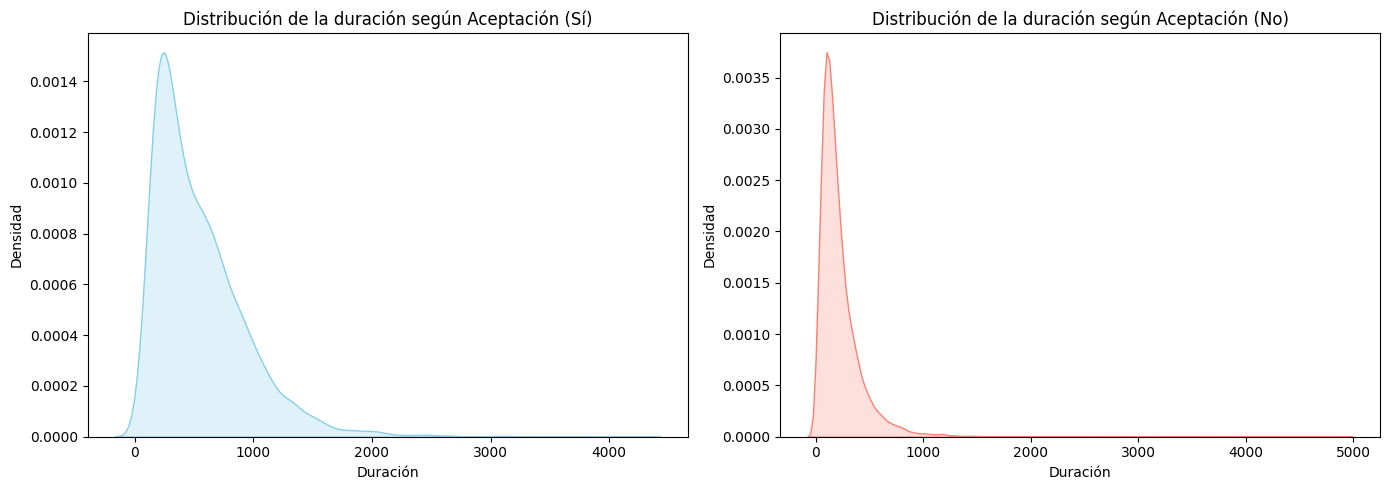

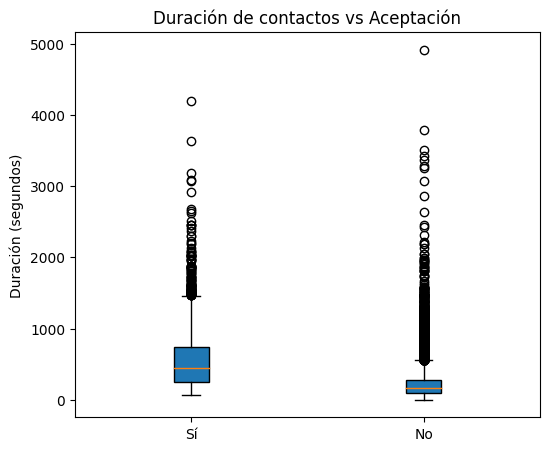

In [11]:
# Filtrar el DataFrame para clientes que aceptaron
df_yes = df[df['y'] == 'yes']
# Filtrar el DataFrame para clientes que no aceptaron
df_no = df[df['y'] == 'no']

# Crear una figura y dos subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico KDE: Distribución de duración para clientes que aceptaron
sns.kdeplot(data=df_yes, x='duration', fill=True, color='skyblue', ax=axs[0])
axs[0].set_title('Distribución de la duración según Aceptación (Sí)')
axs[0].set_xlabel('Duración')
axs[0].set_ylabel('Densidad')

# Gráfico KDE: Distribución de duración para clientes que no aceptaron
sns.kdeplot(data=df_no, x='duration', fill=True, color='salmon', ax=axs[1])
axs[1].set_title('Distribución de la duración según Aceptación (No)')
axs[1].set_xlabel('Duración')
axs[1].set_ylabel('Densidad')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

# Boxplot: Duración de los contactos según aceptación
plt.figure(figsize=(6, 5))
plt.boxplot([df[df['y'] == 'yes']['duration'], df[df['y'] == 'no']['duration']],
            labels=['Sí', 'No'], patch_artist=True)
plt.title('Duración de contactos vs Aceptación')
plt.ylabel('Duración (segundos)')
plt.show()


En estos graficos podemos observar que la distribucion es similar, pero en el grafico de clientes con aceptacion la duracion de la llamada se extiende mas segundos. Hay valores muy atípicos pero podemos concluir que las llamadas con exito suelen durar más.

###Los clientes solteros tienen una mayor probabilidad de aceptar la oferta.


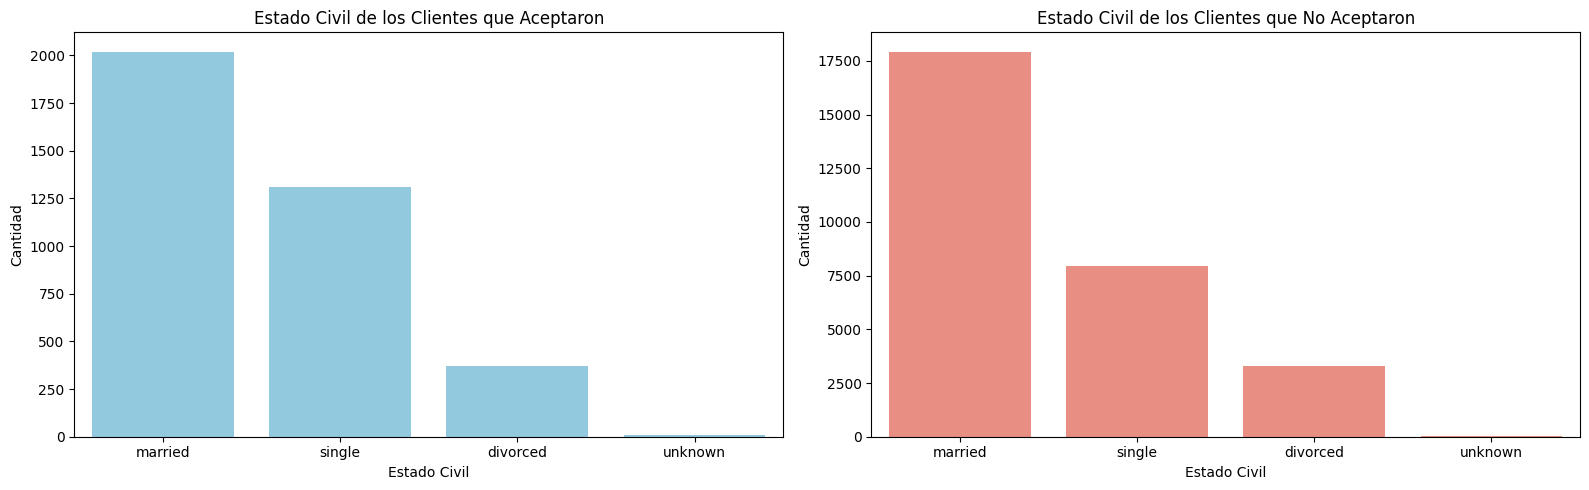

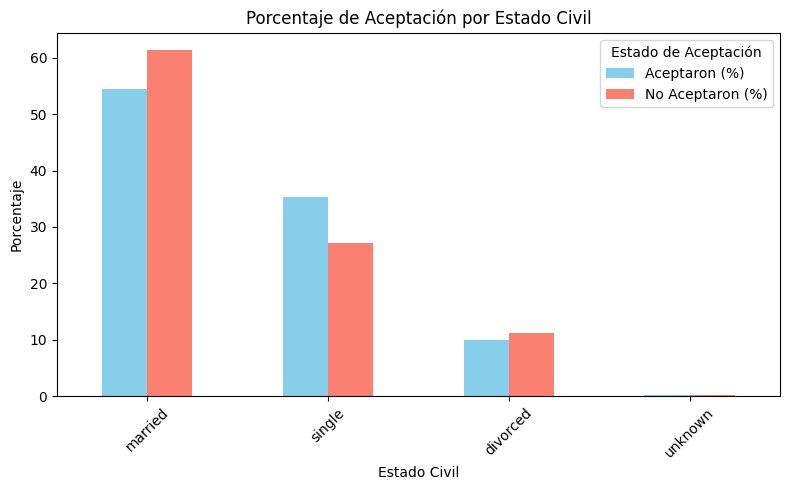

In [12]:
# Crear una figura y dos subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Gráfico de barras: Estado civil vs Aceptación (Clientes que Aceptaron)
sns.countplot(data=df[df['y'] == 'yes'], x='marital', ax=axs[0], color='skyblue')  # Azul claro
axs[0].set_title('Estado Civil de los Clientes que Aceptaron')
axs[0].set_xlabel('Estado Civil')
axs[0].set_ylabel('Cantidad')

# Contar la cantidad de rechazos por estado civil y ordenar de mayor a menor
marital_counts_no = df[df['y'] == 'no']['marital'].value_counts()
sorted_marital_counts_no = marital_counts_no.sort_values(ascending=False)

# Gráfico de barras: Estado civil vs No Aceptación (ordenado de mayor a menor)
sns.countplot(data=df[df['y'] == 'no'], x='marital', ax=axs[1], order=sorted_marital_counts_no.index, color='salmon')  # Rojo claro
axs[1].set_title('Estado Civil de los Clientes que No Aceptaron')
axs[1].set_xlabel('Estado Civil')
axs[1].set_ylabel('Cantidad')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

# Contar la cantidad total de aceptación y no aceptación
marital_counts_yes = df[df['y'] == 'yes']['marital'].value_counts(normalize=True) * 100
marital_counts_no_percentage = df[df['y'] == 'no']['marital'].value_counts(normalize=True) * 100

# Crear un DataFrame para los porcentajes
marital_percentage = pd.DataFrame({
    'Aceptaron (%)': marital_counts_yes,
    'No Aceptaron (%)': marital_counts_no_percentage
}).fillna(0)

# Crear la figura
plt.figure(figsize=(8, 5))

# Graficar porcentajes
marital_percentage.plot(kind='bar', color=['skyblue', 'salmon'], ax=plt.gca())
plt.title('Porcentaje de Aceptación por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45)
plt.legend(title='Estado de Aceptación')

# Mostrar el gráfico de porcentajes
plt.tight_layout()
plt.show()

Podemos observar que en la base de los clientes son mayoria los clientes casados, seguido de los solteros. Por lo que los clientes casados son los que mas propuestas aceptaron. Pero si analizamos en porcentaje los clientes solteros tienen un mayor porcentaje de aceptación en relacion con los que no aceptaron.

###Si los clientes tienen crédito en mora (default), prestamos hipotecarios y/o personales, la probabilidad de que acepten la oferta es menor.


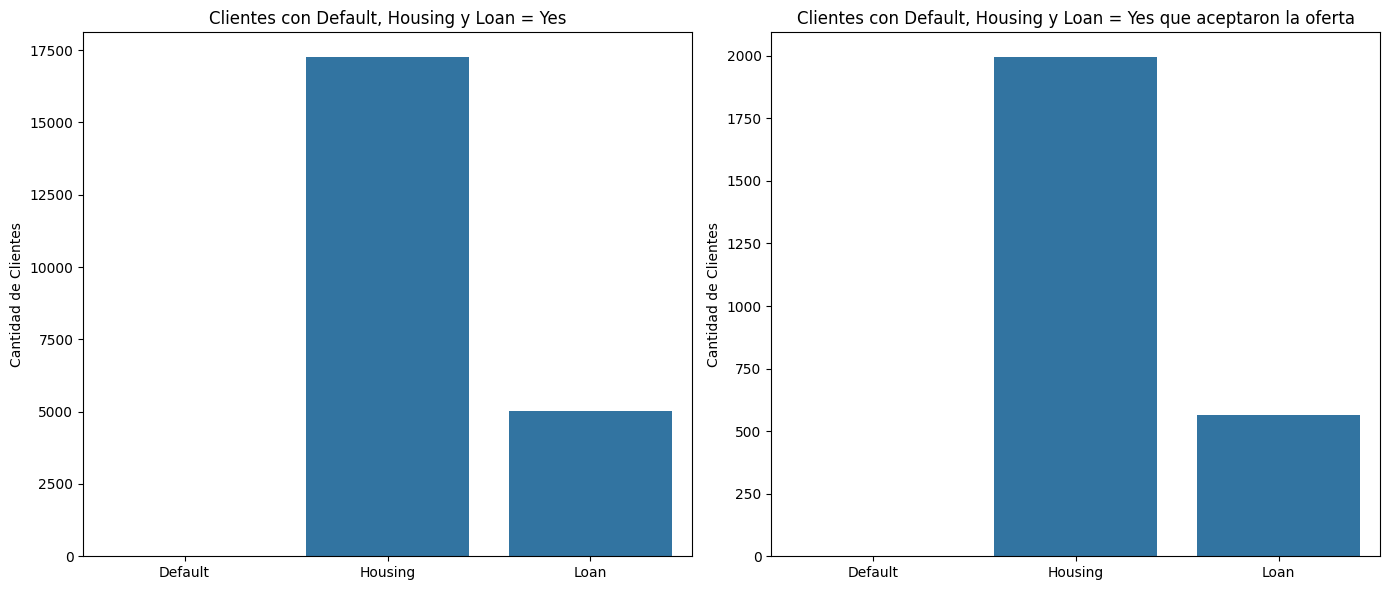

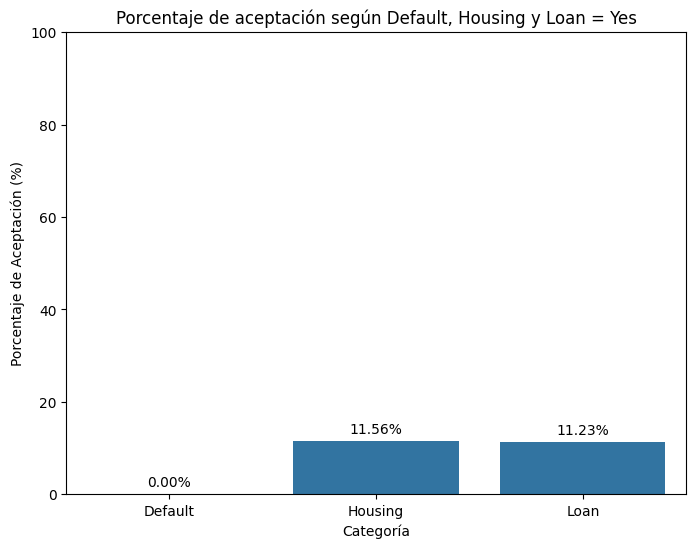

In [13]:
# Crear una figura con dos subgráficos
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Filtrar los datos para contar solo los clientes con default, housing y loan = yes
default_yes = df['default'].value_counts()['yes']
housing_yes = df['housing'].value_counts()['yes']
loan_yes = df['loan'].value_counts()['yes']

# Crear los datos para el primer gráfico (total clientes con default, housing, loan = yes)
categorias = ['Default', 'Housing', 'Loan']
valores_total = [default_yes, housing_yes, loan_yes]

# Gráfico 1: Contar clientes con default, housing, loan = yes
sns.barplot(x=categorias, y=valores_total, ax=ax[0])
ax[0].set_title('Clientes con Default, Housing y Loan = Yes')
ax[0].set_ylabel('Cantidad de Clientes')

# Filtrar los datos donde y = yes (clientes que aceptaron la oferta)
df_accepted = df[df['y'] == 'yes']

# Contar solo los clientes que tienen default, housing, loan = yes y aceptaron la oferta
default_yes_accepted = df_accepted['default'].value_counts().get('yes', 0)
housing_yes_accepted = df_accepted['housing'].value_counts().get('yes', 0)
loan_yes_accepted = df_accepted['loan'].value_counts().get('yes', 0)

# Crear los datos para el segundo gráfico (clientes con default, housing, loan = yes y y = yes)
valores_aceptaron = [default_yes_accepted, housing_yes_accepted, loan_yes_accepted]

# Gráfico 2: Contar clientes con default, housing, loan = yes y que aceptaron la oferta
sns.barplot(x=categorias, y=valores_aceptaron, ax=ax[1])
ax[1].set_title('Clientes con Default, Housing y Loan = Yes que aceptaron la oferta')
ax[1].set_ylabel('Cantidad de Clientes')

plt.tight_layout()
plt.show()

# Total de clientes en cada categoría (default, housing, loan = yes)
total_default_yes = df['default'].value_counts()['yes']
total_housing_yes = df['housing'].value_counts()['yes']
total_loan_yes = df['loan'].value_counts()['yes']

# Clientes que aceptaron la oferta en cada categoría (default, housing, loan = yes)
accepted_default_yes = df_accepted['default'].value_counts().get('yes', 0)
accepted_housing_yes = df_accepted['housing'].value_counts().get('yes', 0)
accepted_loan_yes = df_accepted['loan'].value_counts().get('yes', 0)

# Calcular los porcentajes de aceptación
pct_default_yes = (accepted_default_yes / total_default_yes) * 100
pct_housing_yes = (accepted_housing_yes / total_housing_yes) * 100
pct_loan_yes = (accepted_loan_yes / total_loan_yes) * 100

# Crear los datos para el gráfico
categorias = ['Default', 'Housing', 'Loan']
porcentajes = [pct_default_yes, pct_housing_yes, pct_loan_yes]

# Crear gráfico de barras con los porcentajes de aceptación
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x=categorias, y=porcentajes)

# Mostrar el porcentaje exacto encima de cada barra
for i, porcentaje in enumerate(porcentajes):
    barplot.text(i, porcentaje + 1, f'{porcentaje:.2f}%', ha='center', va='bottom')

plt.title('Porcentaje de aceptación según Default, Housing y Loan = Yes')
plt.ylabel('Porcentaje de Aceptación (%)')
plt.xlabel('Categoría')
plt.ylim(0, 100)  # Establecer límite para el eje y de 0 a 100%
plt.show()

Podemos observar que casi no hay clientes con crédito en default, que hay una amplia cantidad de clientes con prestamos para viviendas, pero el porcentaje de aceptacion es muy similar al porcentaje de aceptacion de todos los clientes (11,3%) por lo que concluimos que no infiere en la aceptacion o no de la oferta de inversion.

###Las campañas son más efectivas en determinados meses y días de la semana.

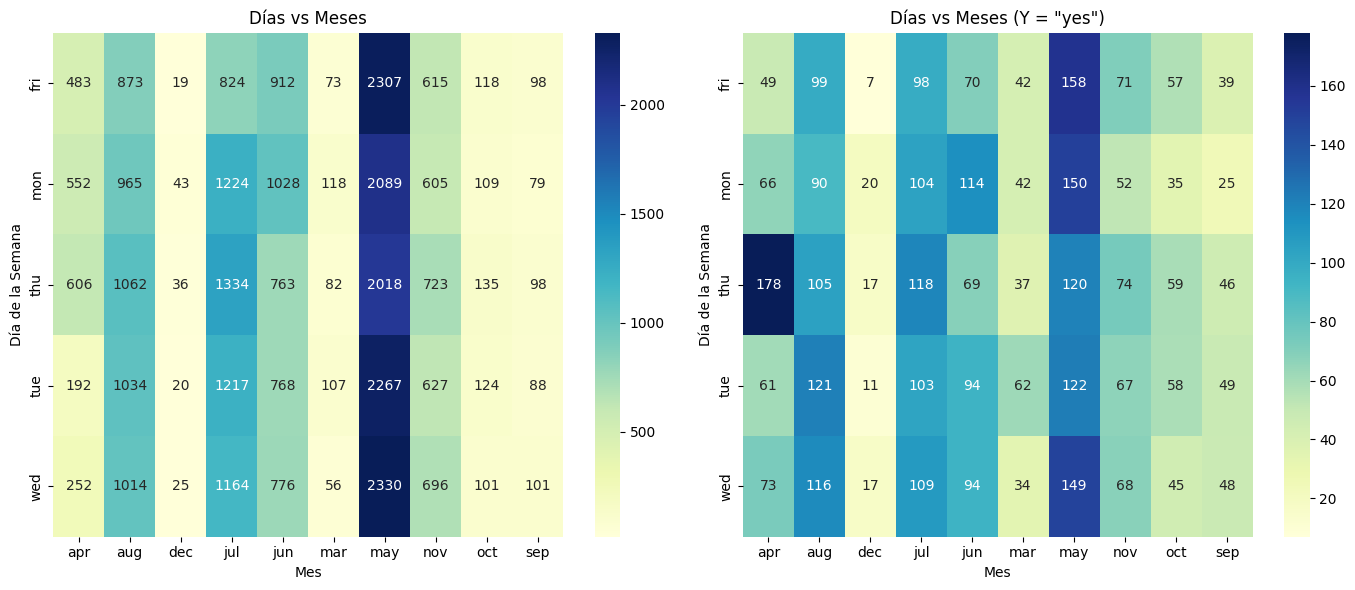

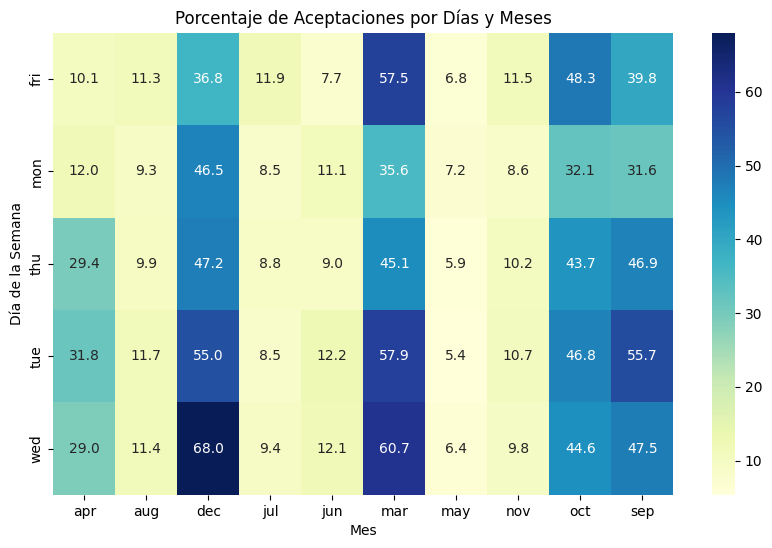

In [14]:
# Crear una tabla pivote con los días de la semana y los meses, contando todas las filas
pivot_all = df.pivot_table(index='day_of_week', columns='month', values='y', aggfunc='count')

# Crear una tabla pivote solo con las filas donde 'y' es 'yes'
pivot_yes = df[df['y'] == 'yes'].pivot_table(index='day_of_week', columns='month', values='y', aggfunc='count')

# Crear una figura y dos subgráficos (1 fila, 2 columnas)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de calor para todas las aceptaciones
sns.heatmap(pivot_all, cmap='YlGnBu', annot=True, fmt='g', ax=axs[0])
axs[0].set_title('Días vs Meses')
axs[0].set_xlabel('Mes')
axs[0].set_ylabel('Día de la Semana')

# Gráfico de calor para solo aceptaciones
sns.heatmap(pivot_yes, cmap='YlGnBu', annot=True, fmt='g', ax=axs[1])
axs[1].set_title('Días vs Meses (Y = "yes")')
axs[1].set_xlabel('Mes')
axs[1].set_ylabel('Día de la Semana')

# Ajustar el espacio entre los gráficos
plt.tight_layout()
plt.show()

# Calcular el total de registros por día y mes
total_counts = df.pivot_table(index='day_of_week', columns='month', values='y', aggfunc='count')

# Calcular el total de aceptaciones por día y mes
acceptance_counts = df[df['y'] == 'yes'].pivot_table(index='day_of_week', columns='month', values='y', aggfunc='count')

# Calcular el porcentaje de aceptaciones
acceptance_percentage = (acceptance_counts.fillna(0) / total_counts.fillna(0)) * 100

# Crear el gráfico de calor para los porcentajes de aceptación
plt.figure(figsize=(10, 6))
sns.heatmap(acceptance_percentage, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Porcentaje de Aceptaciones por Días y Meses')
plt.xlabel('Mes')
plt.ylabel('Día de la Semana')
plt.show()

Analizando los mapas de calor podemos determinar que Mayo, Julio y Agosto fueron los meses donde mas se contactaron con los clientes. Si tenemos en cuenta solo los clientes que dijeron que si, tambien vemos que en Mayo, Julio y Agosto fue cuando hubo mayores contactos. Pero si analizamos el porcentaje de aceptacion de propuestas (cantidad de aceptacion / cant. de clientes contactados) vemos una eficiencia mator en Diciembre, Marzo, Octubre y Septiembre.